<a href="https://colab.research.google.com/github/felixzhao/title_catgories_classification/blob/main/1.1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [ ]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

# load data

This work loads data from google drive. Please put the files into "trademe_data" folder under the root of google drive.

Then run the following code to mount the google drive in colab.

You can follow the guide. https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_path = "drive/MyDrive/trademe_data/"

## load categories data

In [ ]:

cat_raw = pd.read_csv(f"{root_path}categories.csv")
cat_raw.head()

,y_cat_id,cat_1,cat_2,cat_3
0,4957,construction & roading,health & safety,health & safety
1,4958,hr & recruitment,health & safety,health & safety
2,4960,automotive,automotive technician,automotive technician
3,4961,automotive,diesel mechanic,diesel mechanic
4,4962,automotive,management,management


## load data.csv

In [ ]:
data_raw = pd.read_csv(f"{root_path}data.csv")
data_raw.head()

,x_title,y_cat_id
0,unqualified asbestos remover,5192
1,senior test analyst,5123
2,ict trainer / supervisor,6894
3,automotive specialists *multi faceted position*,5197
4,business analyst,5114


# EDA

## EDA for categories 

In [ ]:
len(cat_raw)

196

In [ ]:
cat_raw.describe()

,y_cat_id
count,196.000000
mean,4737.877551
std,1745.563718
min,621.000000
25%,5025.750000
50%,5096.500000
75%,5168.250000
max,9831.000000


In [ ]:
cat_raw.columns

Index(['y_cat_id', 'cat_1', 'cat_2', 'cat_3'], dtype='object')

## unique count of categories

In [ ]:
print(f"unique in cat 1: {len(cat_raw.cat_1.unique())}")
print(f"unique in cat 1: {len(cat_raw.cat_2.unique())}")
print(f"unique in cat 1: {len(cat_raw.cat_3.unique())}")

unique in cat 1: 25
unique in cat 1: 162
unique in cat 1: 176


In [ ]:
cat_raw.cat_1.unique().tolist()

['construction & roading',
 'hr & recruitment',
 'automotive',
 'accounting',
 'agriculture, fishing & forestry',
 'banking, finance & insurance',
 'architecture',
 'customer service',
 'education',
 'engineering',
 'transport & logistics',
 'government & council',
 'healthcare',
 'hospitality & tourism',
 'it',
 'legal',
 'manufacturing & operations',
 'marketing, media & communications',
 'office & administration',
 'sales',
 'retail',
 'science & technology',
 'trades & services',
 'property',
 'executive & general management']

In [ ]:
cat_raw.cat_2.unique().tolist()[:10]

['health & safety',
 'automotive technician',
 'diesel mechanic',
 'management',
 'panel & paint',
 'sales, operations & parts',
 'accounts payable',
 'accounts receivable',
 'accounts administrators',
 'finance managers & controllers']

In [ ]:
cat_raw.cat_3.unique().tolist()[:10]

['health & safety',
 'automotive technician',
 'diesel mechanic',
 'management',
 'panel & paint',
 'sales, operations & parts',
 'accounts payable',
 'accounts receivable',
 'accounts administrators',
 'finance managers & controllers']

## count of unique value for categories 

### cat 1 categories groups

In [ ]:
cat_1_groups = cat_raw[['cat_1','y_cat_id']].groupby('cat_1').count().sort_values(by='y_cat_id', ascending=False)

<AxesSubplot:xlabel='cat_1'>

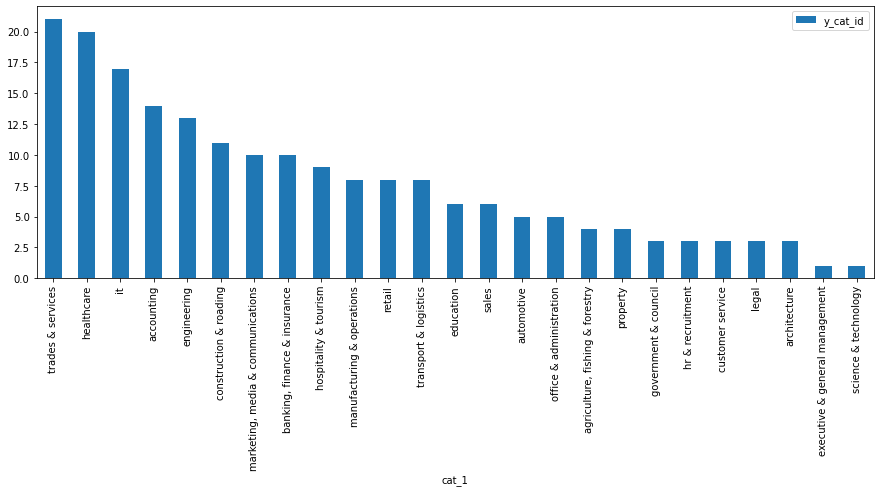

In [ ]:
cat_1_groups.plot.bar(figsize=(15,5))

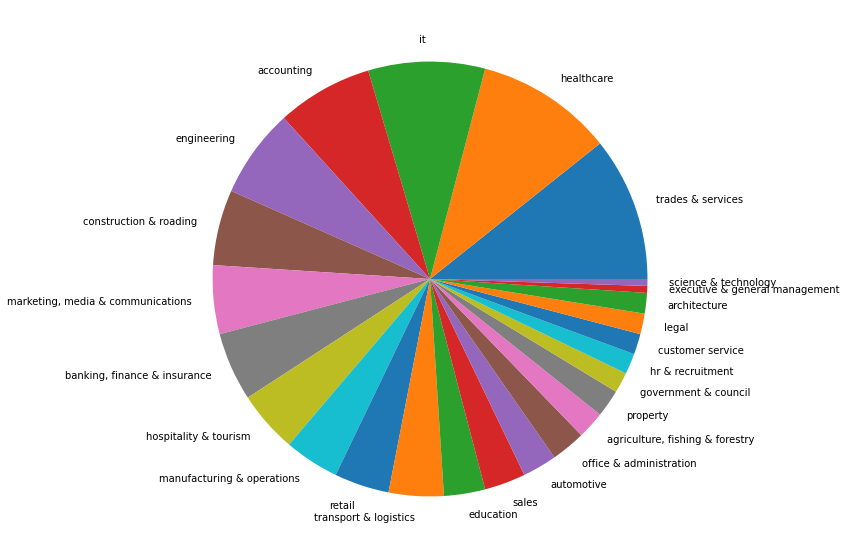

In [ ]:
f = plt.figure()
f.set_figwidth(200)
f.set_figheight(10)
t = plt.pie(cat_1_groups['y_cat_id'], labels =cat_1_groups.index )
plt.show() 

### cat 2 categories groups

In [ ]:
cat_2_groups = cat_raw[['cat_2','y_cat_id']].groupby('cat_2').count().sort_values(by='y_cat_id', ascending=False)

<AxesSubplot:xlabel='cat_2'>

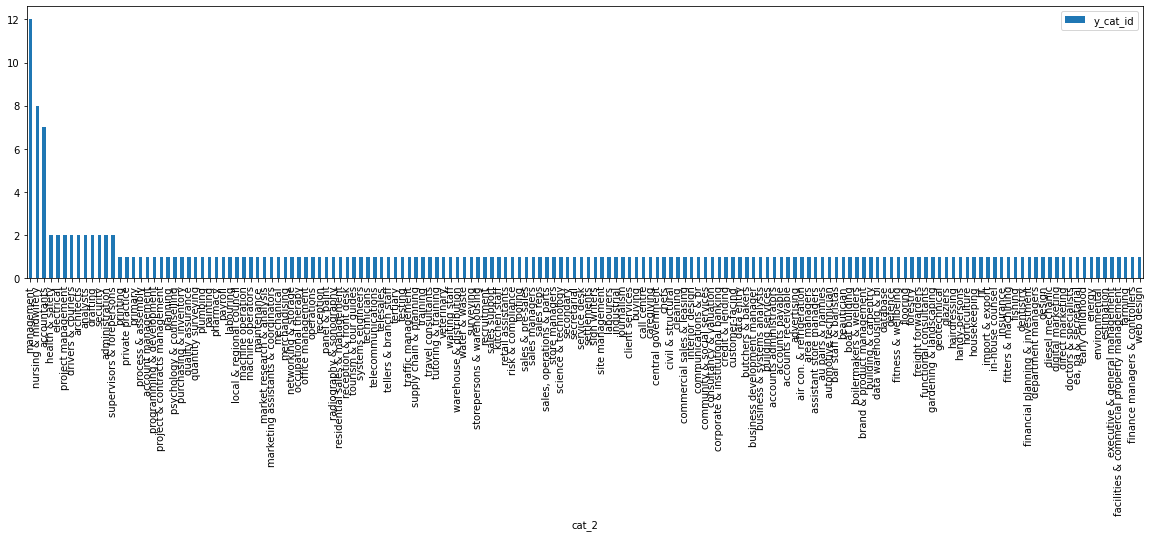

In [ ]:
cat_2_groups.plot.bar(figsize=(20,5))

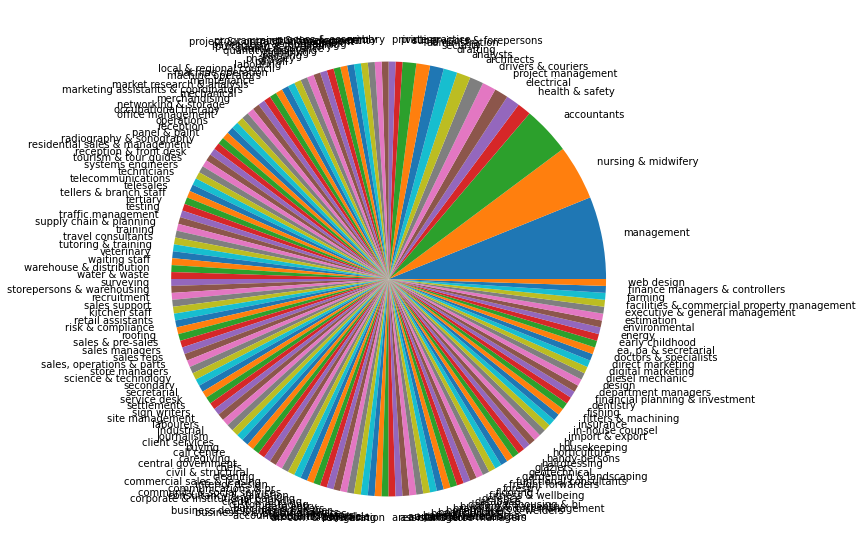

In [ ]:
f = plt.figure()
f.set_figwidth(200)
f.set_figheight(10)
t = plt.pie(cat_2_groups['y_cat_id'], labels =cat_2_groups.index )
plt.show() 

cat 3 categories groups

In [ ]:
cat_3_groups = cat_raw[['cat_3','y_cat_id']].groupby('cat_3').count().sort_values(by='y_cat_id', ascending=False)

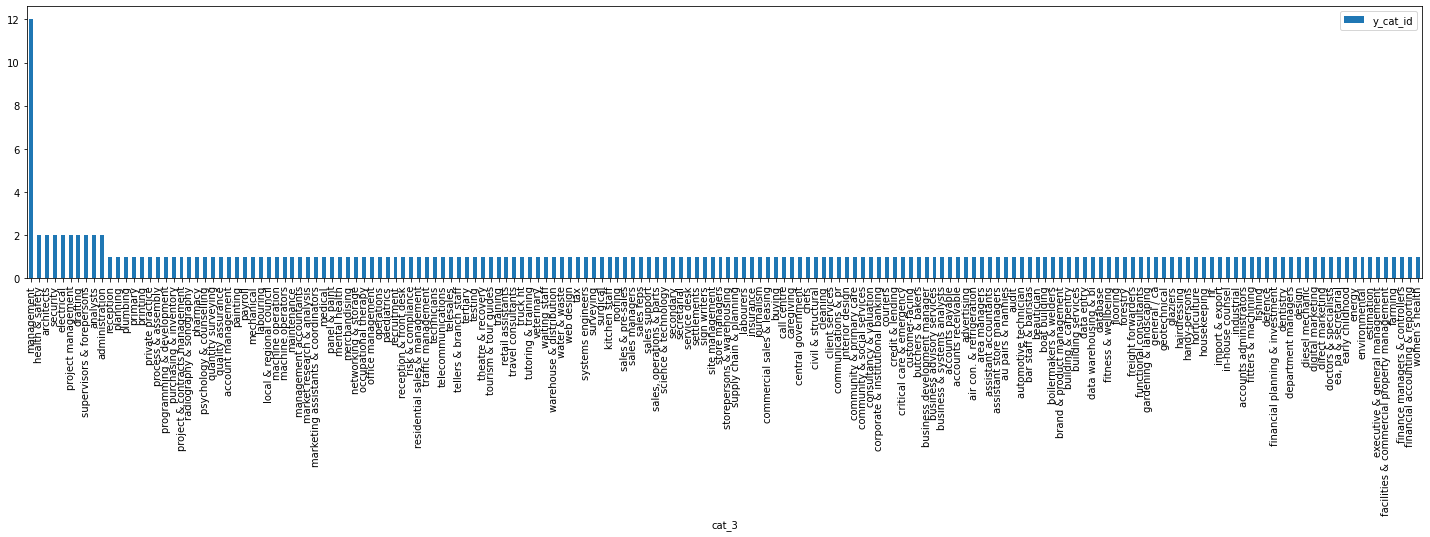

In [ ]:
t = cat_3_groups.plot.bar(figsize=(25,5))

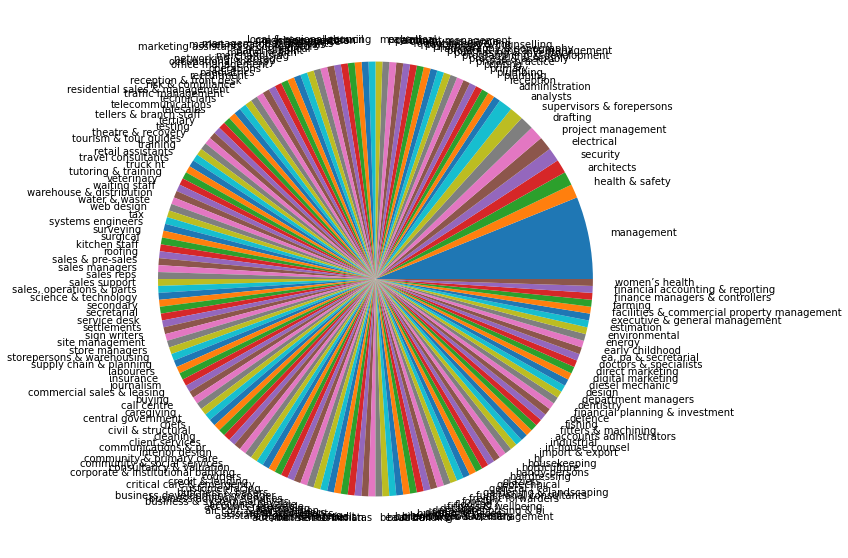

In [ ]:
f = plt.figure()
f.set_figwidth(200)
f.set_figheight(10)
t = plt.pie(cat_3_groups['y_cat_id'], labels =cat_3_groups.index )
plt.show() 

## parallel categories of job titles

In [ ]:
import plotly.express as px

df = cat_raw
fig = px.parallel_categories(df, dimensions=['cat_1', 'cat_2', 'cat_3'],
                color_continuous_scale=px.colors.sequential.Inferno,
                width=1000, height=3000)

fig.show()

## EDA for data

In [ ]:
data_raw.describe()

,y_cat_id
count,20000.00000
mean,4999.95955
std,1284.72560
min,621.00000
25%,5058.00000
50%,5114.00000
75%,5184.00000
max,9831.00000


In [ ]:
data_raw.columns

Index(['x_title', 'y_cat_id'], dtype='object')

In [ ]:
print(f'unique in x_title: {len(data_raw.x_title.unique())}')

unique in x_title: 14411


In [ ]:
data_raw.x_title.unique().tolist()[:10]

['unqualified asbestos remover',
 'senior test analyst',
 'ict trainer / supervisor',
 'automotive specialists *multi faceted position*',
 'business analyst',
 'experienced excavator operator truck driver',
 'systems accountant',
 'industrial electrician',
 'chef',
 'project architect']

In [ ]:
def show_categories_distribution_by_group(data_cat_groups_with_level, category_group):
    data_cat_groups = data_cat_groups_with_level[[category_group,'x_title']].groupby(category_group).sum().sort_values(by='x_title', ascending=False)
    data_cat_groups = data_cat_groups.reset_index()
    fig = px.bar(data_cat_groups, x=category_group, y='x_title')
    fig.show()
    f = plt.figure()
    f.set_figwidth(200)
    f.set_figheight(10)
    t = plt.pie(data_cat_groups['x_title'], labels =data_cat_groups[category_group] )
    plt.show() 

In [ ]:
data_cat_groups = data_raw.groupby('y_cat_id').count().sort_values(by='x_title', ascending=False)
data_cat_groups = data_cat_groups.reset_index()
data_cat_groups

,y_cat_id,x_title
0,5186,828
1,5156,695
2,5175,656
3,6909,607
4,5100,524
...,...,...
190,840,2
191,5153,2
192,5104,2
193,5025,2


In [ ]:
data_cat_groups_with_level = pd.merge(data_cat_groups, cat_raw, on='y_cat_id', how='left')
data_cat_groups_with_level.head(1)

,y_cat_id,x_title,cat_1,cat_2,cat_3
0,5186,828,trades & services,building & carpentry,building & carpentry


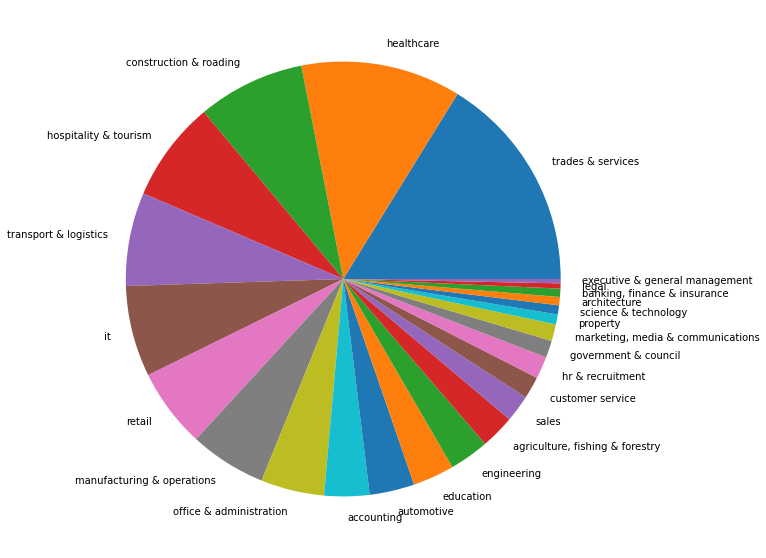

In [ ]:
show_categories_distribution_by_group(data_cat_groups_with_level, 'cat_1')

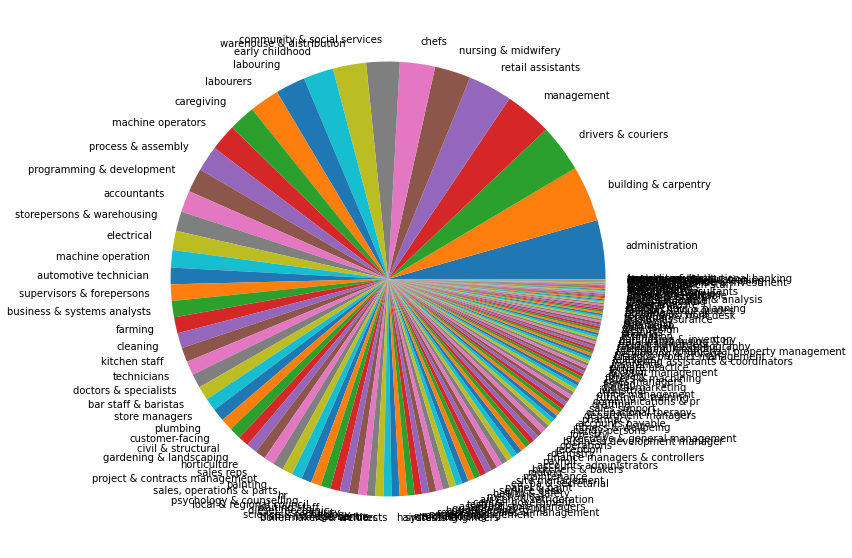

In [ ]:
show_categories_distribution_by_group(data_cat_groups_with_level, 'cat_2')

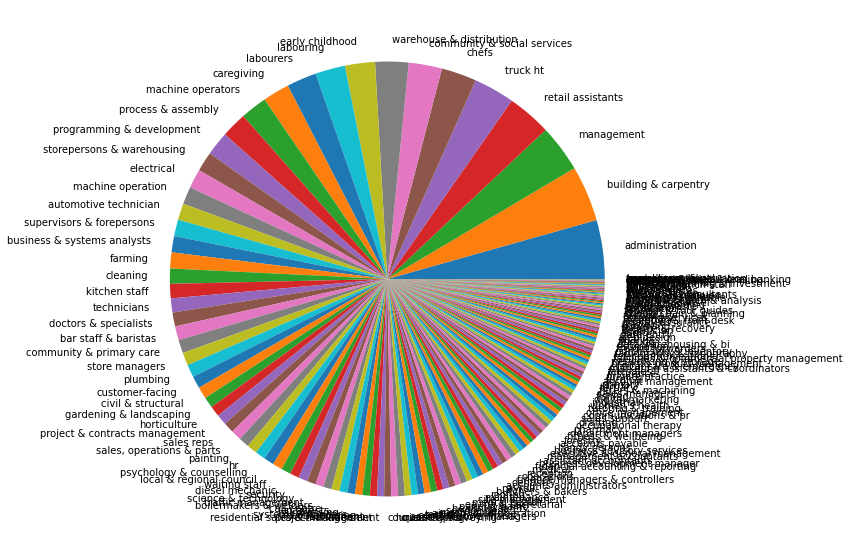

In [ ]:
show_categories_distribution_by_group(data_cat_groups_with_level, 'cat_3')

diff level of cats in data analysis

In [ ]:
data_cats = pd.merge(data_raw, cat_raw, on='y_cat_id', how='left')

In [ ]:
data_cats.columns

Index(['x_title', 'y_cat_id', 'cat_1', 'cat_2', 'cat_3'], dtype='object')

In [ ]:
len(data_cats)

20000

In [ ]:
len(data_raw)

20000

In [ ]:
data_cats.head(10)

,x_title,y_cat_id,cat_1,cat_2,cat_3
0,unqualified asbestos remover,5192,trades & services,labourers,labourers
1,senior test analyst,5123,it,testing,testing
2,ict trainer / supervisor,6894,education,tutoring & training,tutoring & training
3,automotive specialists *multi faceted position*,5197,trades & services,technicians,technicians
4,business analyst,5114,it,business & systems analysts,business & systems analysts
5,experienced excavator operator truck driver,6891,construction & roading,machine operators,machine operators
6,systems accountant,6884,accounting,accountants,financial accounting & reporting
7,industrial electrician,5188,trades & services,electrical,electrical
8,chef,5100,hospitality & tourism,chefs,chefs
9,project architect,5034,architecture,architects,architects


In [ ]:
df = data_cats
fig = px.parallel_categories(df, dimensions=['cat_1', 'cat_2', 'cat_3'],
                color_continuous_scale=px.colors.sequential.Inferno,
                width=1000, height=3000)

fig.show()


# word cloud of Titles

In [ ]:
text = " ".join(title for title in data_cats.x_title)

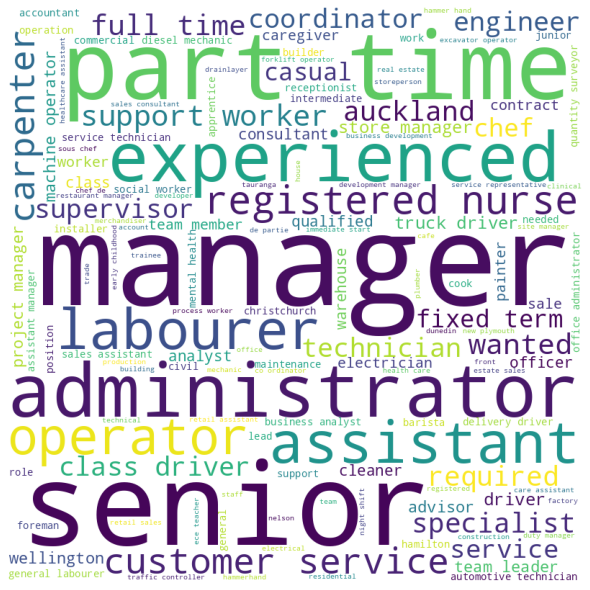

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()